<a href="https://colab.research.google.com/github/stanleykelman/ML-AI-Portfolio/blob/main/Capstone_Project_Reference_Notebook_Full_Code_Used_Cars_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Used Cars Price Prediction**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?

### **The objective:**

 - What is the intended goal?

### **The key questions:**

- What are the key questions that need to be answered?

### **The problem formulation**:

- What is it that we are trying to solve using data science?

### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

### **Loading libraries**

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

from sklearn.model_selection import train_test_split


In [ ]:
# Google Drive Mounting
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Let us load the data**

In [ ]:
#data = pd.read_csv("used_cars.csv")

df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/CAPSTONE PROJECT/used_cars.csv")

## Data Overview

- Observations
- Sanity checks

In [ ]:
# Display the first few rows
print(df.head())

   S.No.                              Name    Location  Year  \
0      0            Maruti Wagon R LXI CNG      Mumbai  2010   
1      1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2      2                      Honda Jazz V     Chennai  2011   
3      3                 Maruti Ertiga VDI     Chennai  2012   
4      4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
0              72000       CNG       Manual      First    26.60   998.0   
1              41000    Diesel       Manual      First    19.67  1582.0   
2              46000    Petrol       Manual      First    18.20  1199.0   
3              87000    Diesel       Manual      First    20.77  1248.0   
4              40670    Diesel    Automatic     Second    15.20  1968.0   

    Power  Seats  New_price  Price  
0   58.16    5.0        NaN   1.75  
1  126.20    5.0        NaN  12.50  
2   88.70    5.0       8.61   4.50  
3   88.76    7.0

In [ ]:
print(df.tail(5))

      S.No.                                               Name   Location  \
7248   7248                  Volkswagen Vento Diesel Trendline  Hyderabad   
7249   7249                             Volkswagen Polo GT TSI     Mumbai   
7250   7250                             Nissan Micra Diesel XV    Kolkata   
7251   7251                             Volkswagen Polo GT TSI       Pune   
7252   7252  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...      Kochi   

      Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  \
7248  2011              89411    Diesel       Manual      First    20.54   
7249  2015              59000    Petrol    Automatic      First    17.21   
7250  2012              28000    Diesel       Manual      First    23.08   
7251  2013              52262    Petrol    Automatic      Third    17.20   
7252  2014              72443    Diesel    Automatic      First    10.00   

      Engine  Power  Seats  New_price  Price  
7248  1598.0  103.6    5.0       

In [ ]:
# Check data types and non-null counts
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB
None


In [ ]:
print(df.isnull().sum())

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64


# **Understanding Quality, Shape, and Size**

In [ ]:
print(df.shape)

(7253, 14)


In [ ]:
print(df.columns)

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_price', 'Price'],
      dtype='object')


In [ ]:
print(df.dtypes)

S.No.                  int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
New_price            float64
Price                float64
dtype: object


In [ ]:
print(df.nunique())

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               438
Engine                150
Power                 383
Seats                   8
New_price             625
Price                1373
dtype: int64


In [ ]:
print(df.isnull().sum())

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64


In [ ]:
print(df[df.isnull().any(axis=1)])

      S.No.                                               Name    Location  \
0         0                             Maruti Wagon R LXI CNG      Mumbai   
1         1                   Hyundai Creta 1.6 CRDi SX Option        Pune   
3         3                                  Maruti Ertiga VDI     Chennai   
4         4                    Audi A4 New 2.0 TDI Multitronic  Coimbatore   
5         5                    Hyundai EON LPG Era Plus Option   Hyderabad   
...     ...                                                ...         ...   
7248   7248                  Volkswagen Vento Diesel Trendline   Hyderabad   
7249   7249                             Volkswagen Polo GT TSI      Mumbai   
7250   7250                             Nissan Micra Diesel XV     Kolkata   
7251   7251                             Volkswagen Polo GT TSI        Pune   
7252   7252  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi   

      Year  Kilometers_Driven Fuel_Type Transmission Owner_Type

In [ ]:
## Categorical Variables - Name, Location, Fuel_Type, Transmission, and Owner_Type
# For each column of type 'object', print the value counts
for column in df.select_dtypes(include=['object']).columns:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print("\n")  # Adds a newline for better readability between columns


Value counts for Name:
Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: Name, Length: 2041, dtype: int64


Value counts for Location:
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64


Value counts for Fuel_Type:
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64


Value counts for Transmission:
Manual       5204
Automatic    

#**Exploratory Data Analysis**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What is the summary statistics of the data? Explore summary statistics for numerical variables and the categorical variables
2. Find out number of unique observations in each category of categorical columns? Write your findings/observations/insights
3. Check the extreme values in different columns of the given data and write down the observtions? Remove the data where the values are un-realistic

## **Univariate Analysis**

**Questions:**

1. Do univariate analysis for numerical and categorical variables?
2. Check the distribution of the different variables? is the distributions skewed?
3. Do we need to do log_transformation, if so for what variables we need to do?
4. Perfoem the log_transformation(if needed) and write down your observations?

In [ ]:
#Summary Statistics for Numeric Variables
summary_statistics = df.describe()
print(summary_statistics)

             S.No.         Year  Kilometers_Driven      Mileage       Engine  \
count  7253.000000  7253.000000       7.253000e+03  7251.000000  7207.000000   
mean   3626.000000  2013.365366       5.869906e+04    18.141580  1616.573470   
std    2093.905084     3.254421       8.442772e+04     4.562197   595.285137   
min       0.000000  1996.000000       1.710000e+02     0.000000    72.000000   
25%    1813.000000  2011.000000       3.400000e+04    15.170000  1198.000000   
50%    3626.000000  2014.000000       5.341600e+04    18.160000  1493.000000   
75%    5439.000000  2016.000000       7.300000e+04    21.100000  1968.000000   
max    7252.000000  2019.000000       6.500000e+06    33.540000  5998.000000   

             Power        Seats    New_price        Price  
count  7078.000000  7200.000000  1006.000000  6019.000000  
mean    112.765214     5.280417    22.779692     9.479468  
std      53.493553     0.809277    27.759344    11.187917  
min      34.200000     2.000000     3.9

Name: ['Maruti Wagon R LXI CNG' 'Hyundai Creta 1.6 CRDi SX Option'
 'Honda Jazz V' ... 'Ford EcoSport 1.5 Petrol Ambiente'
 'Jeep Compass 1.4 Sport' 'Hyundai Elite i20 Magna Plus']
Location: ['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
Fuel_Type: ['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
Transmission: ['Manual' 'Automatic']
Owner_Type: ['First' 'Second' 'Fourth & Above' 'Third']


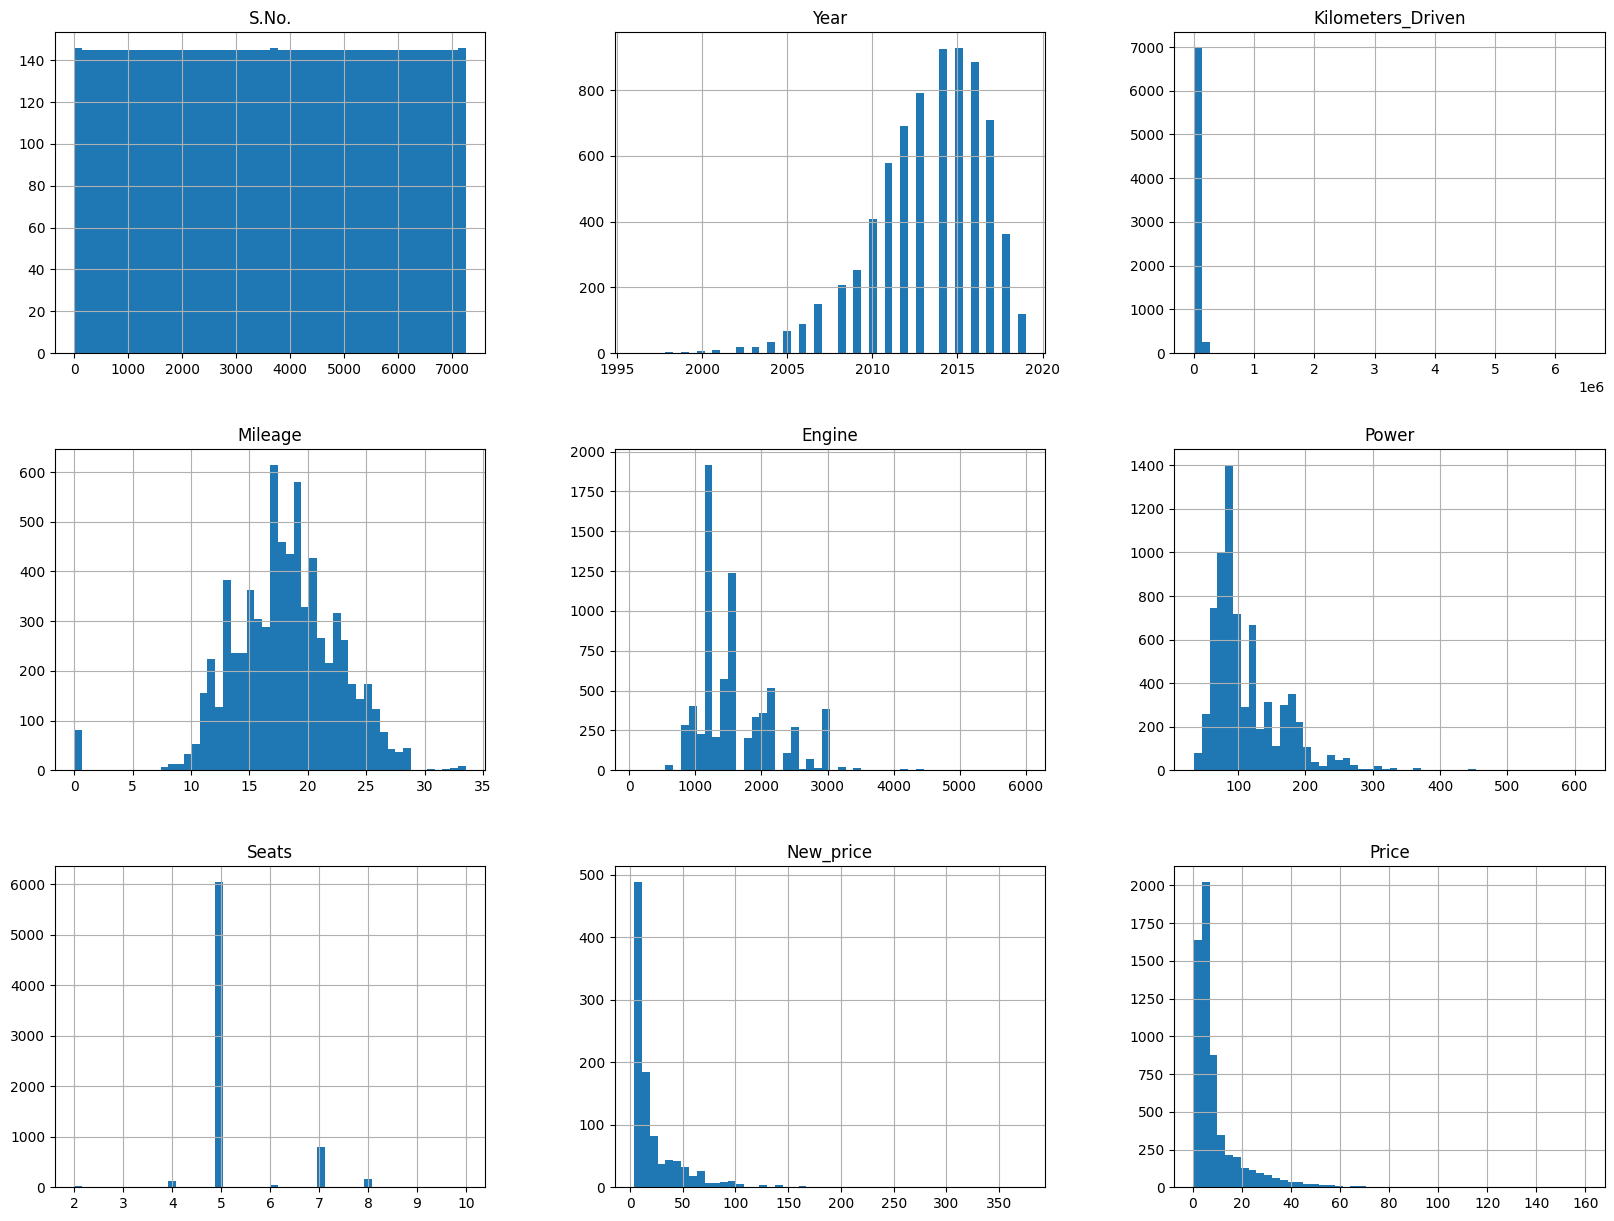

In [ ]:
for column in df.select_dtypes(include=['object']).columns:
    print(f"{column}:", df[column].unique())

df.hist(bins=50, figsize=(20,15))
plt.show()

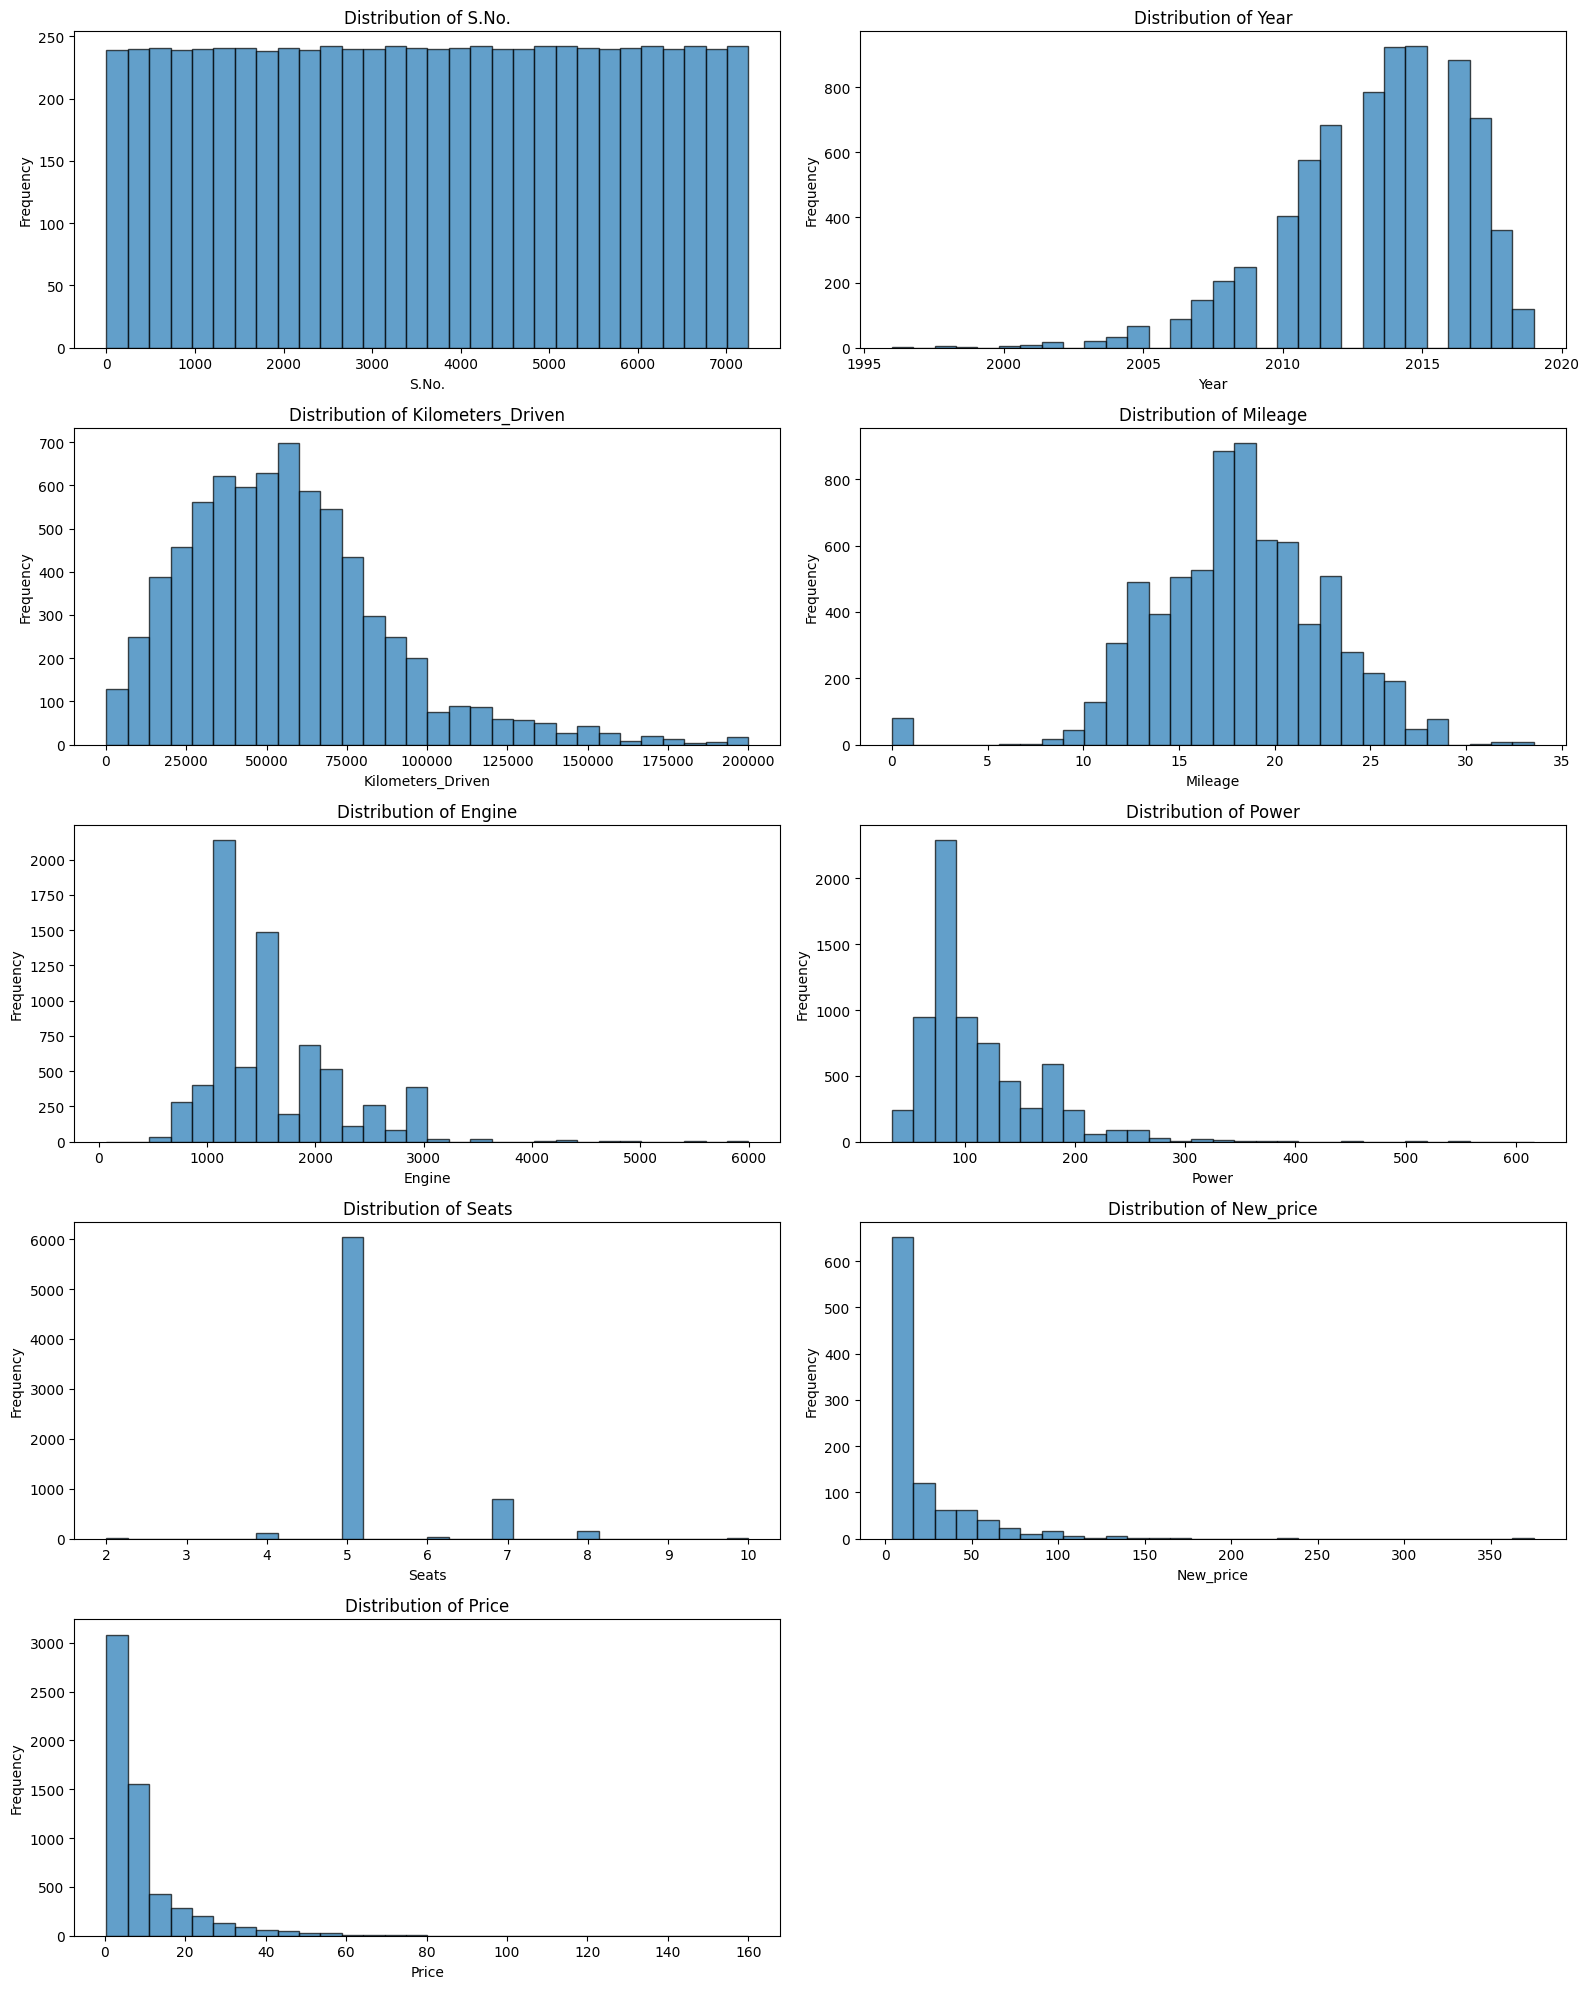

In [ ]:

import numpy as np


# Identifying extreme values and potential outliers in 'Kilometers_Driven'
# We'll define extreme values as those beyond the 99.5 percentile for this context.
extreme_threshold_km = df['Kilometers_Driven'].quantile(0.995)
extreme_values_km = df[df['Kilometers_Driven'] > extreme_threshold_km]

# Removing rows with unrealistic 'Kilometers_Driven' values
data_cleaned = df[df['Kilometers_Driven'] <= extreme_threshold_km]

# Selecting numerical columns for distribution analysis
numerical_cols = data_cleaned.select_dtypes(include=np.number).columns.tolist()

# Plotting histograms
n_cols = 2 # Number of columns in subplot
n_rows = (len(numerical_cols) + 1) // n_cols # Calculate required number of rows, rounding up

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4)) # Adjust the figure size as needed

for i, col in enumerate(numerical_cols):
    ax = axes[i//n_cols, i%n_cols] # Determine which subplot to use
    ax.hist(data_cleaned[col], bins=30, edgecolor='k', alpha=0.7)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# If the number of numerical columns is odd, the last subplot will be empty and can be turned off
if len(numerical_cols) % n_cols:
    axes[-1, -1].axis('off')

plt.tight_layout() # Adjust subplots to fit in the figure area
plt.show()


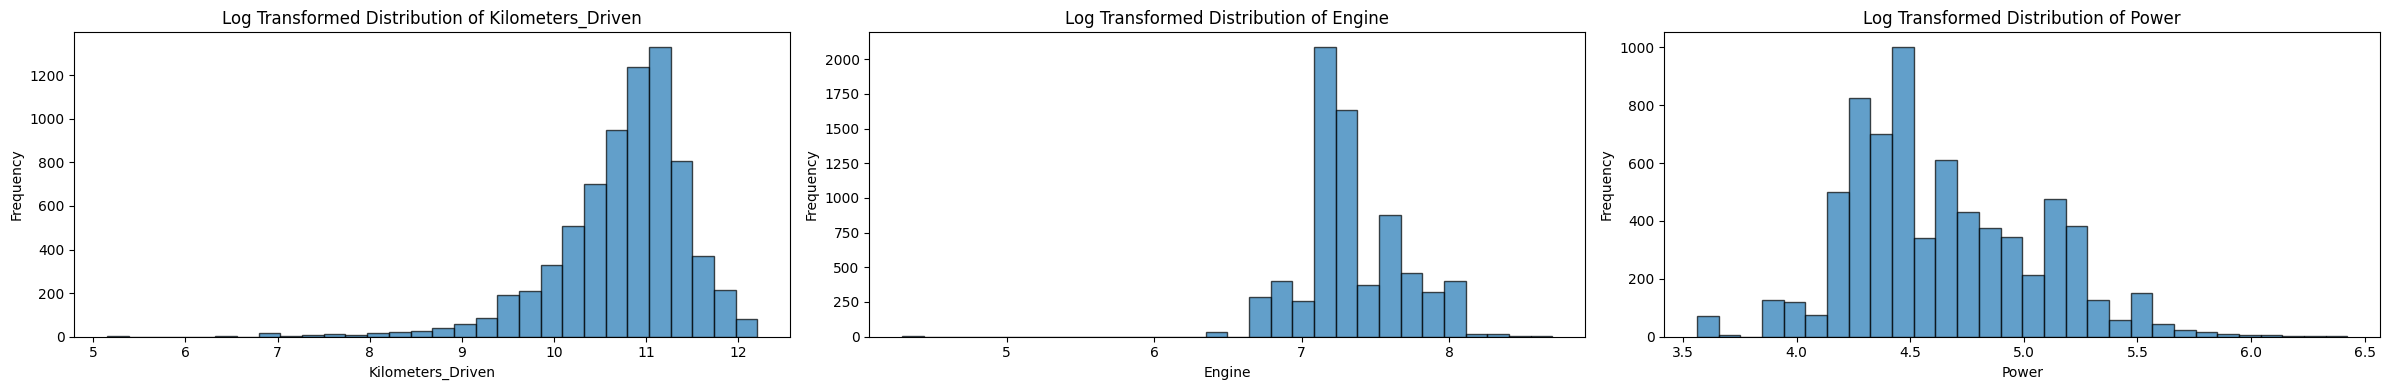

Kilometers_Driven    0
Engine               0
Power                0
dtype: int64


In [ ]:
# Log Transformation of Skewed Variables
# Adding a small constant because log(0) is undefined and we want to avoid negative infinity values.
# Checking for zero values in the columns we're interested in transforming
zero_values_check = (data_cleaned[['Kilometers_Driven', 'Engine', 'Power']] == 0).sum()

# Performing log transformation where applicable
data_transformed = data_cleaned.copy()
if zero_values_check.sum() == 0:  # If no zero values, we can proceed with the transformation
    for col in ['Kilometers_Driven', 'Engine', 'Power']:
        data_transformed[col] = np.log1p(data_transformed[col])

# Visualizing the distributions after log transformation
cols_to_transform = ['Kilometers_Driven', 'Engine', 'Power']
n_cols = len(cols_to_transform)
fig, axes = plt.subplots(1, n_cols, figsize=(8 * n_cols, 4)) # Adjust figure size as necessary

for i, col in enumerate(cols_to_transform):
    axes[i].hist(data_transformed[col], bins=30, edgecolor='k', alpha=0.7)
    axes[i].set_title(f'Log Transformed Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout() # Adjust subplots to fit in the figure area
plt.show()

print(zero_values_check)


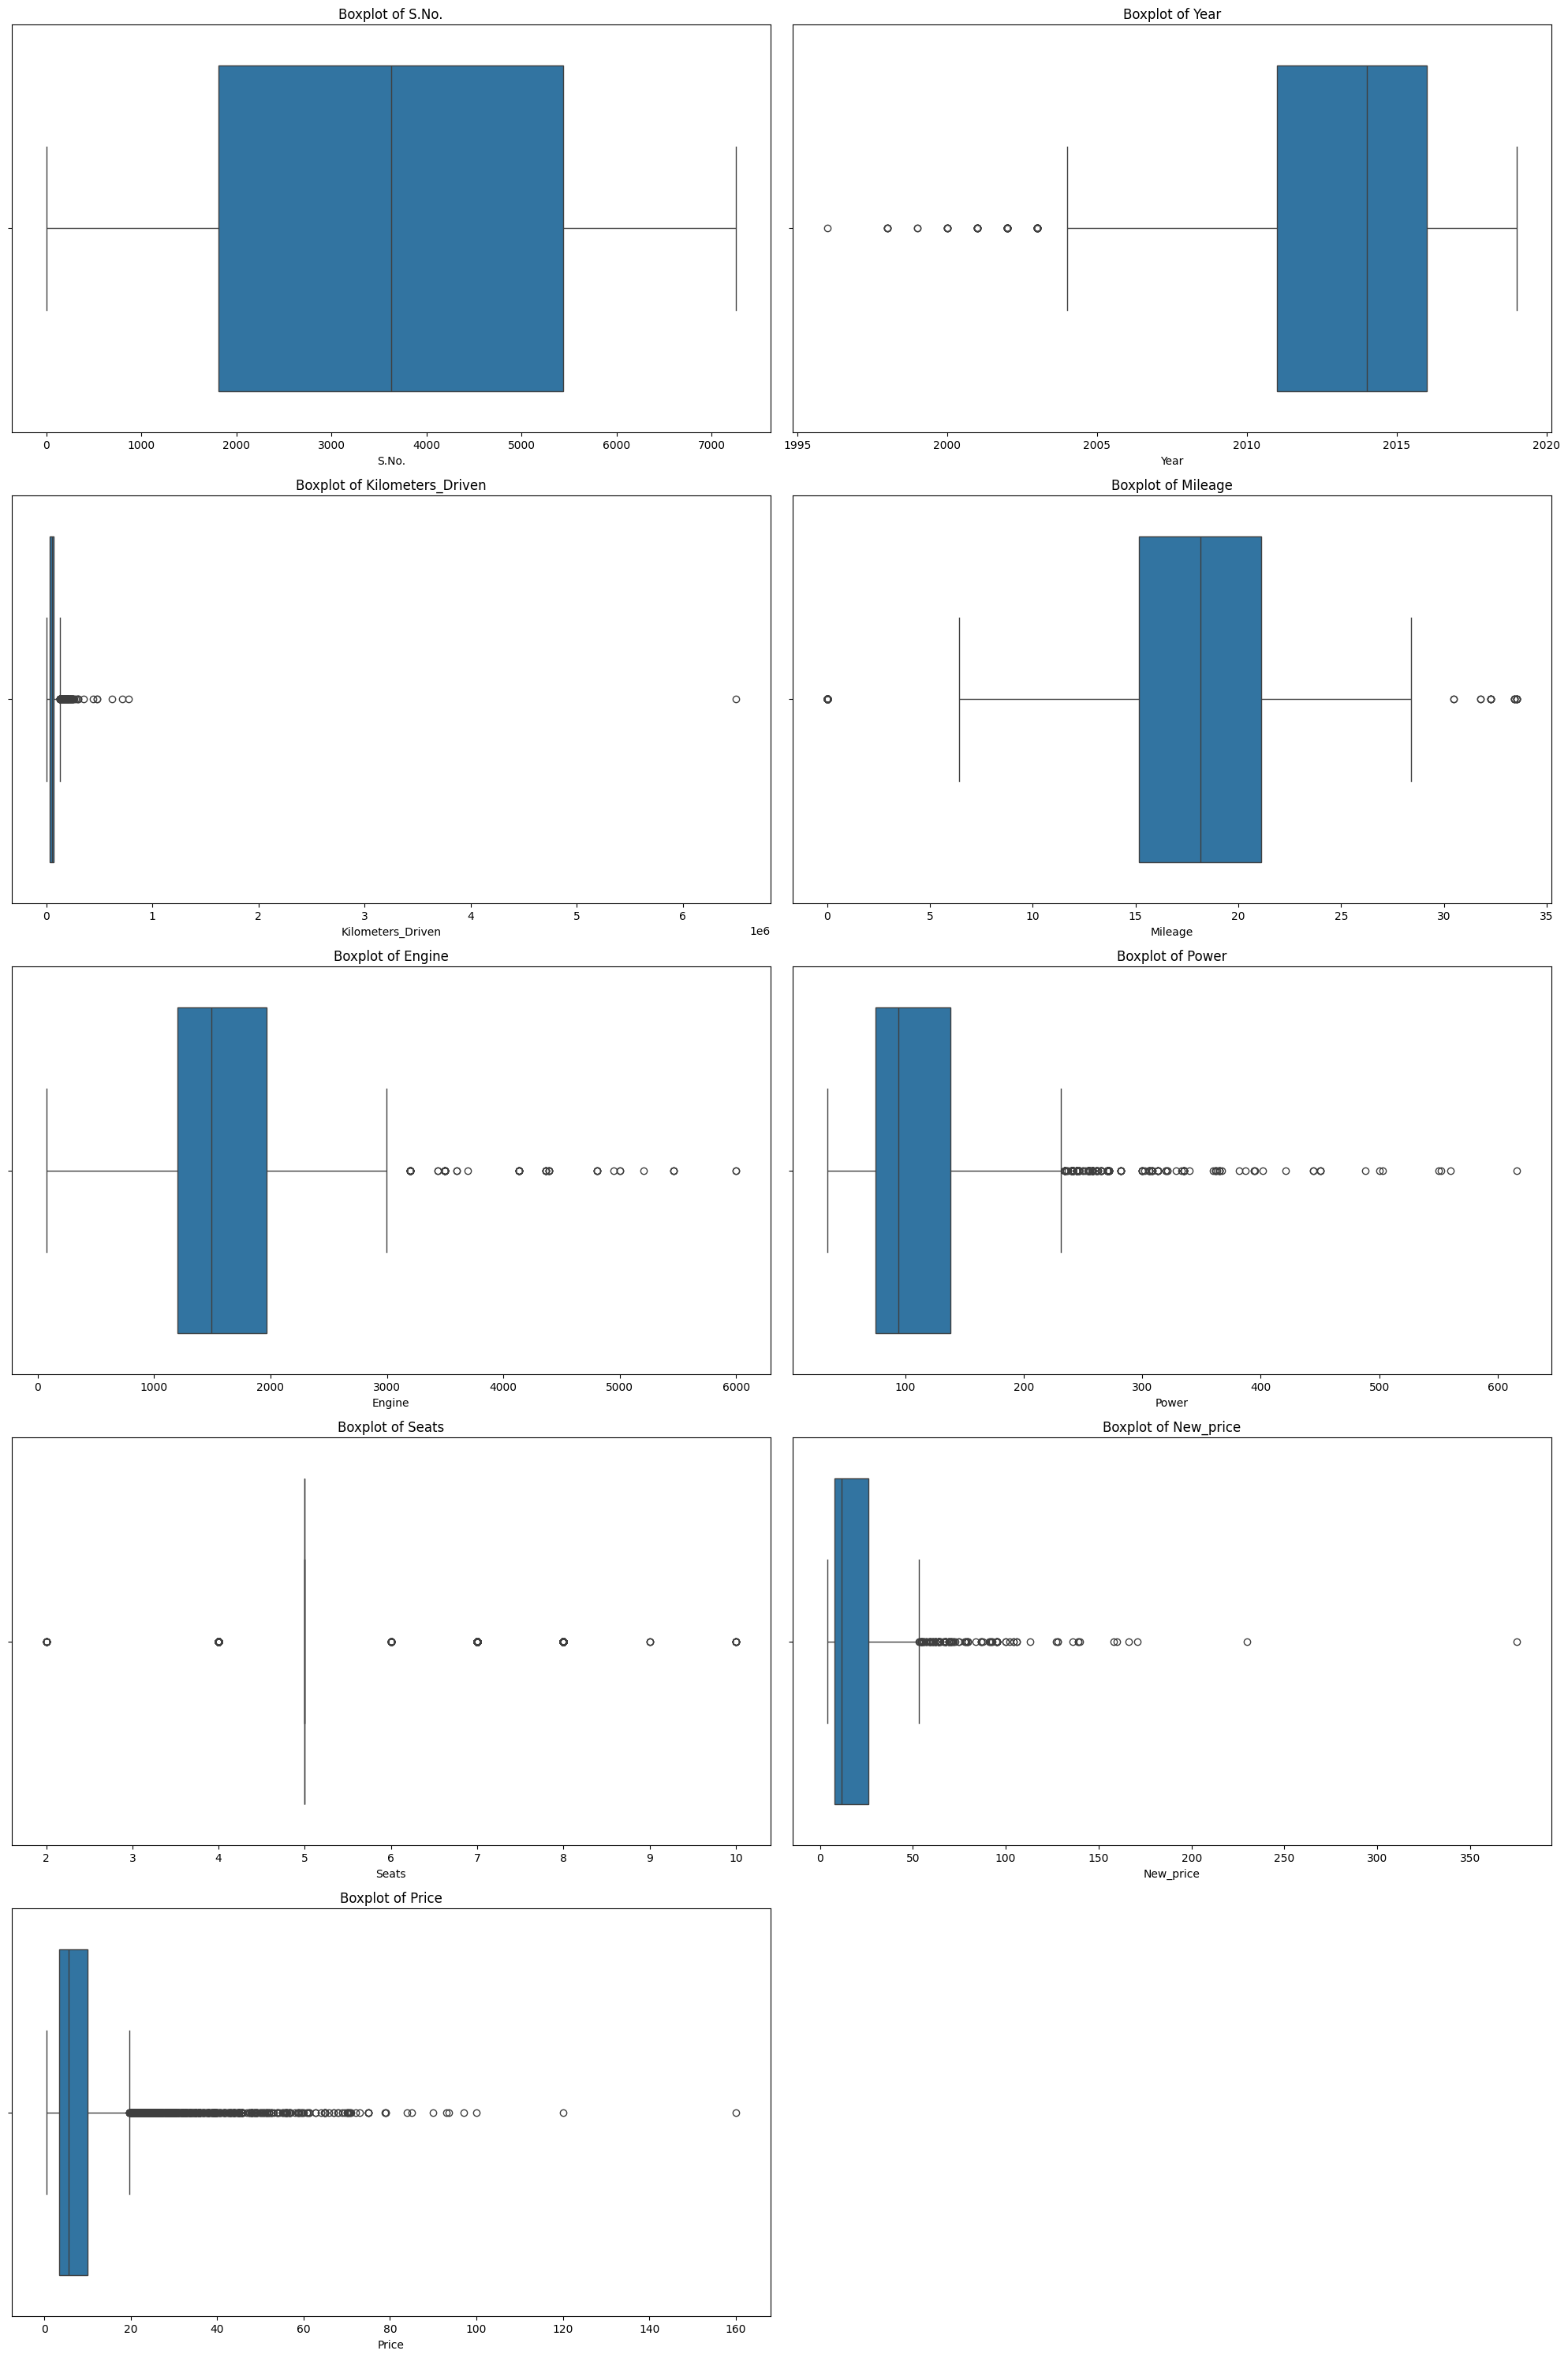

In [ ]:
# 'df' is my DataFrame and 'numerical_cols_df' is a list of numerical columns I want to plot
numerical_cols_df = df.select_dtypes(include=np.number).columns.tolist()

# Calculating the number of rows needed for the subplots
n_cols = 2  # Display two graphs per row
n_rows = (len(numerical_cols_df) + 1) // n_cols  # Calculate rows needed, round up if odd number of columns

# Creating a figure and array of axes to plot on
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6 * n_rows))  # Adjust the figure size as necessary

for i, col in enumerate(numerical_cols_df):
    row, col_idx = divmod(i, n_cols)  # Determine the row and column index for the subplot
    sns.boxplot(x=df[col], ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Boxplot of {col}')
    axes[row, col_idx].set_xlabel(col)

# If you have an odd number of columns, hide the last subplot if it's unused
if len(numerical_cols_df) % n_cols:
    axes[-1, -1].axis('off')  # Hide the last subplot if not used

plt.tight_layout()  # Adjust subplots to fit in the figure area
plt.show()

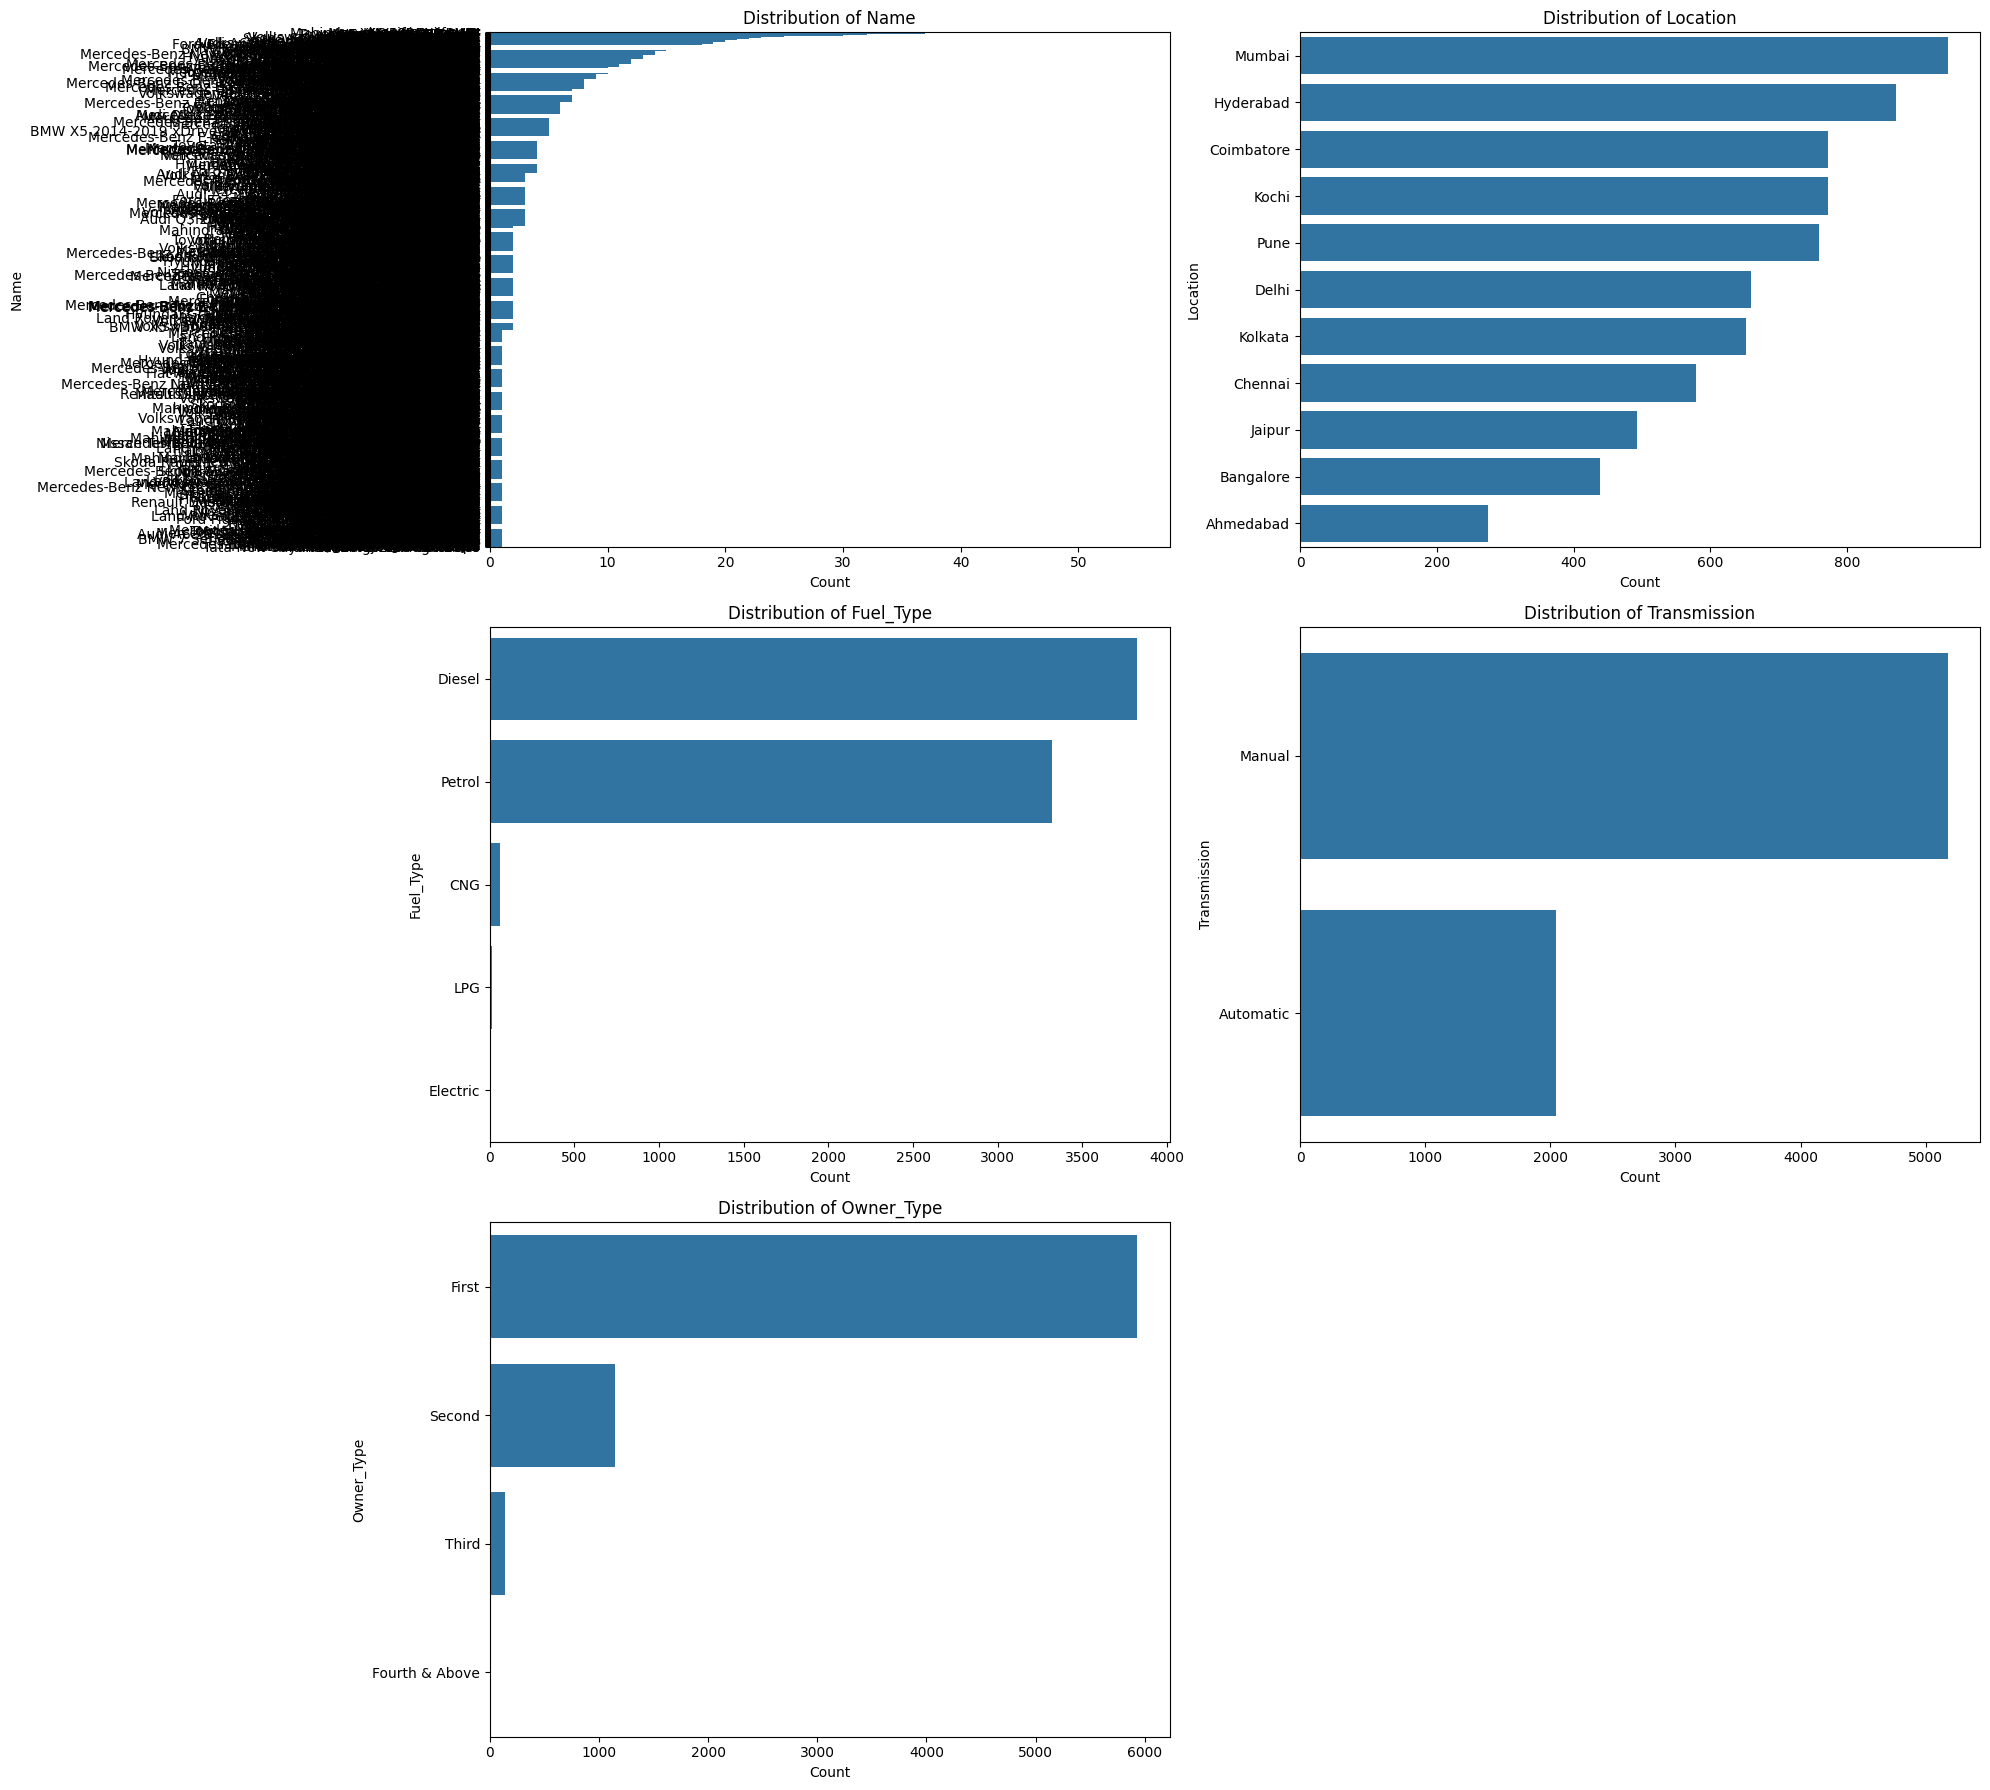

In [ ]:
# 'data_transformed' is the DataFrame and 'categorical_cols' is a list of categorical columns to plot
categorical_cols = data_transformed.select_dtypes(include=['object']).columns.tolist()

# Setting the number of columns per row
n_cols = 2  # Number of graphs per row
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols  # Calculate rows needed, rounding up for any partial row

# Creating a figure and array of axes to plot on
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6 * n_rows))  # Adjust figure size as needed

# Flattening the array of axes for easy iteration
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(y=data_transformed[col], order=data_transformed[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(col)

# Hide any unused subplots if you have an odd number of categorical columns
if len(categorical_cols) % n_cols:
    for j in range(i + 1, n_rows * n_cols):
        fig.delaxes(axes[j])

plt.tight_layout()  # Adjust subplots to fit in the figure area
plt.show()

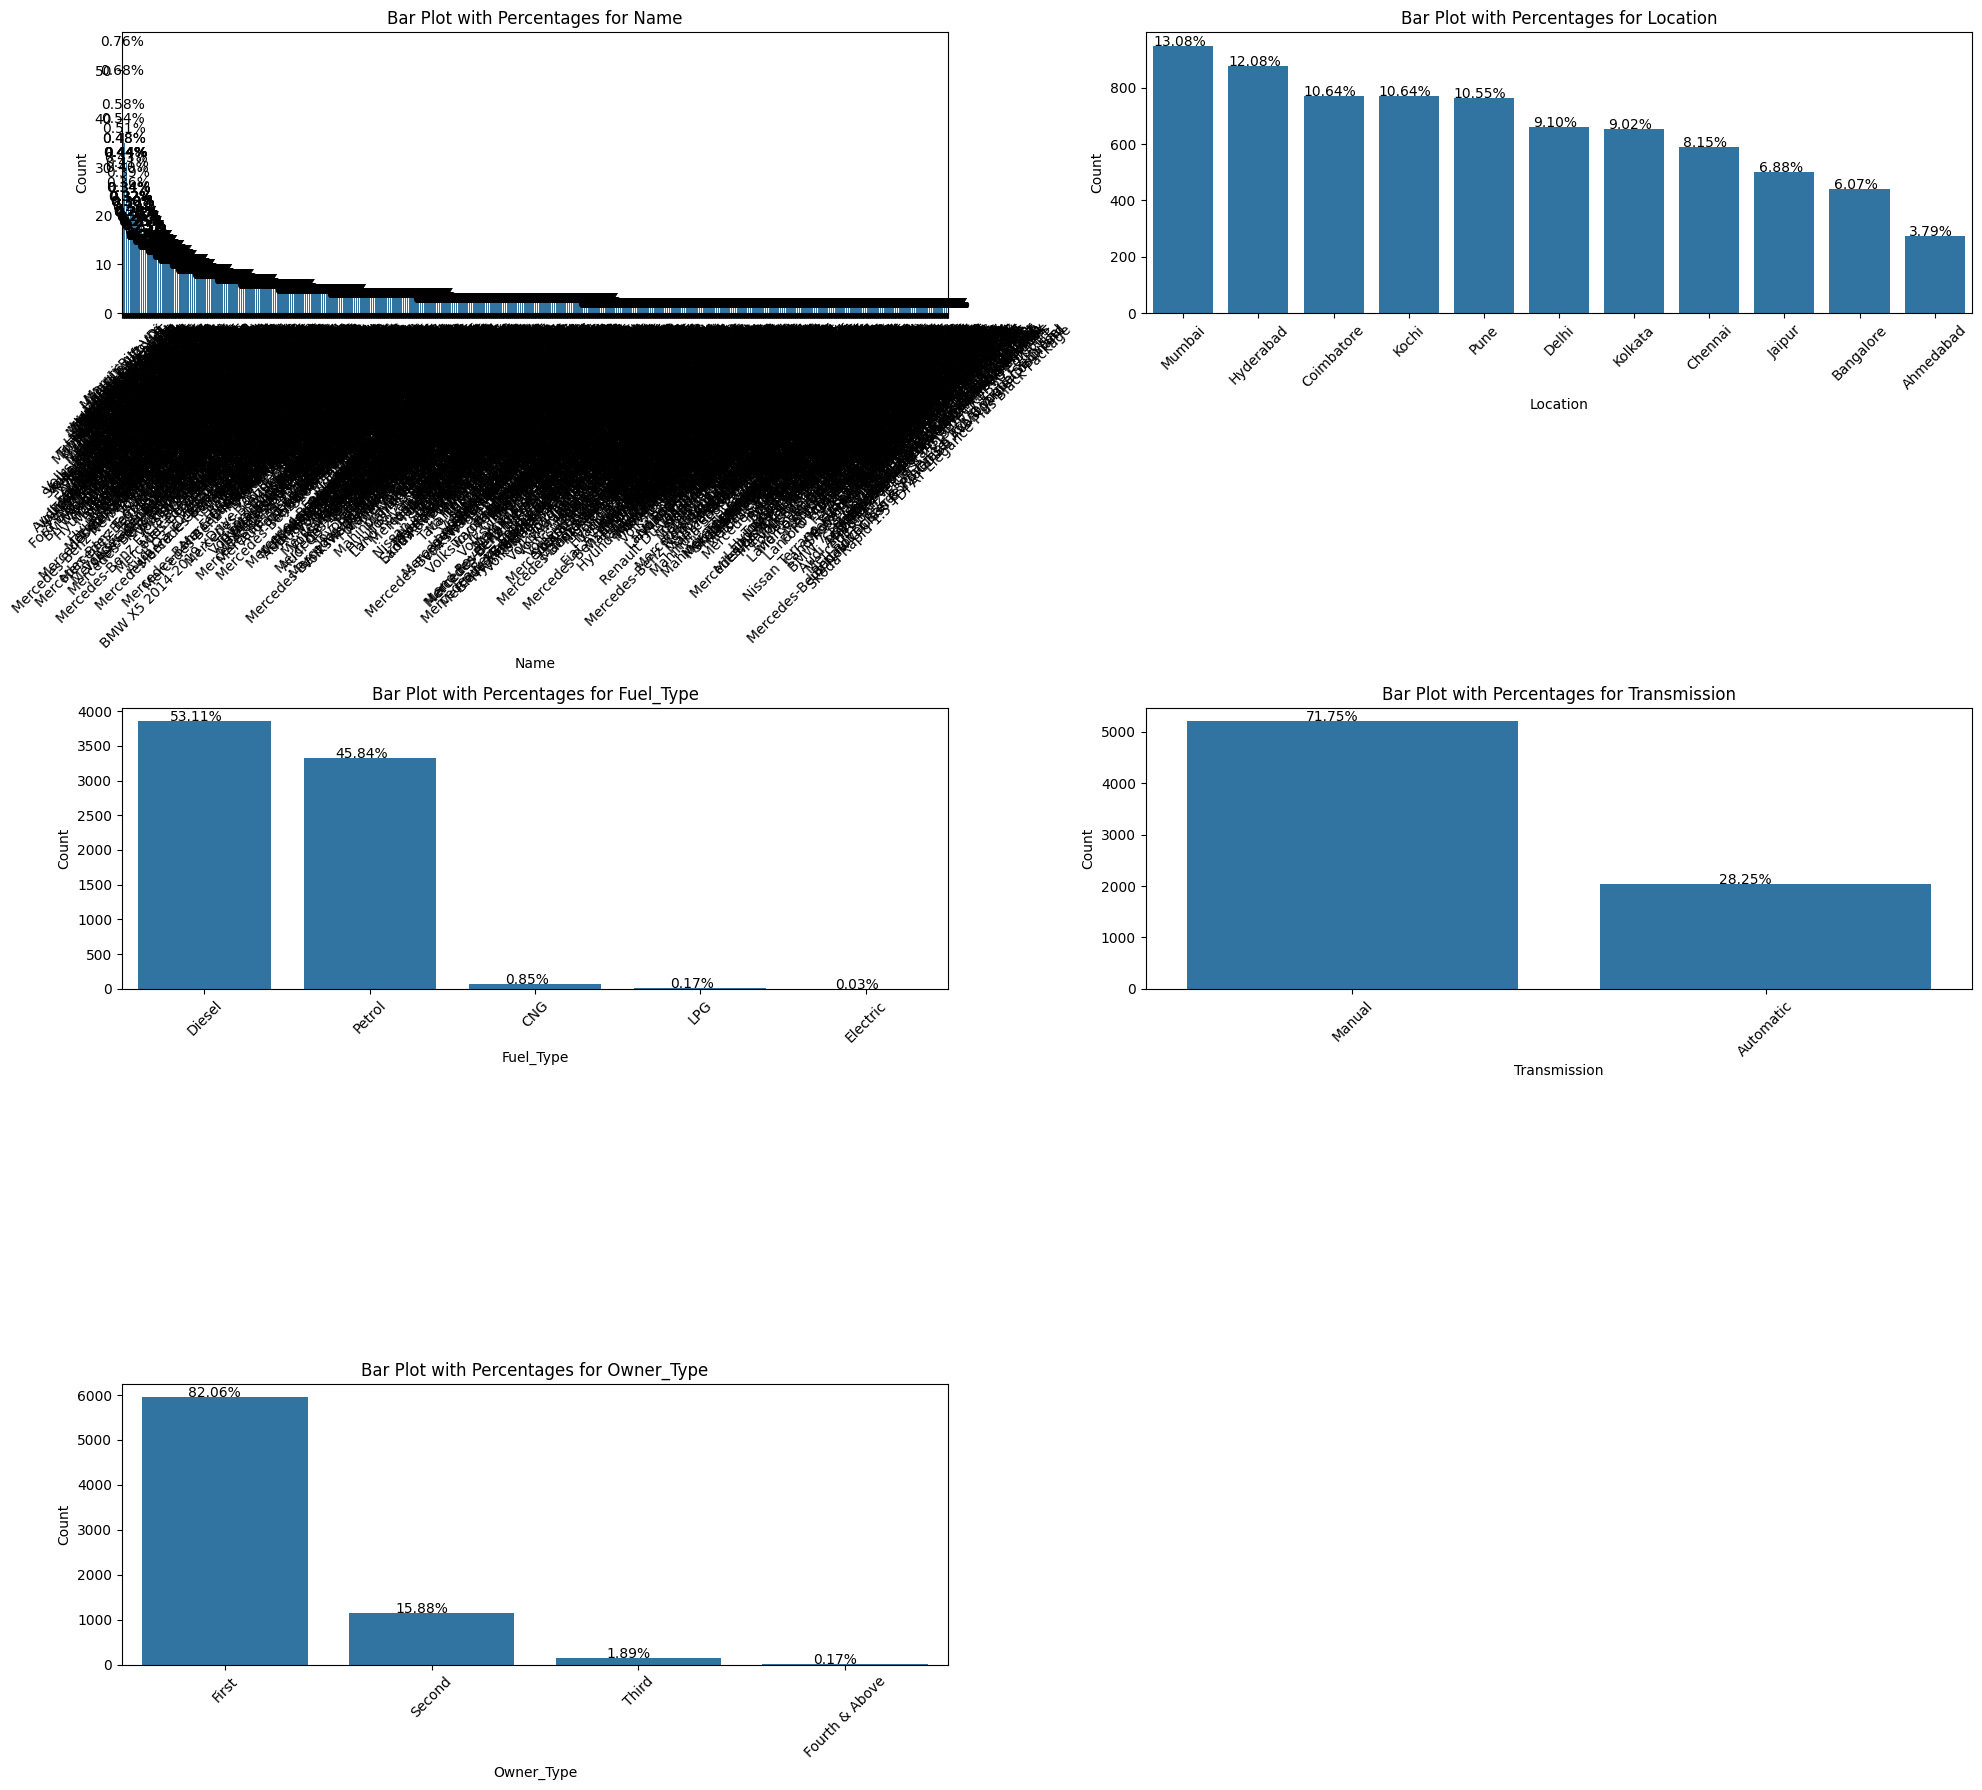

In [ ]:
# Assuming 'df' is the DataFrame and 'categorical_cols' is already defined
# Function to add percentages on bars
def perc_on_bar(plot, precision):
    total = len(df)  # Total number of data points for each categorical variable
    for p in plot.patches:
        percentage = f'{100 * p.get_height() / total:.{precision}f}%'
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), ha='center')

# Setting the layout for 2 plots per row
n_cols = 2
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

# Creating the subplot structure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6 * n_rows))
axes = axes.flatten()  # Flatten the axes array if needed for easy iteration

for i, col in enumerate(categorical_cols):
    plot = sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Bar Plot with Percentages for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    perc_on_bar(plot, 2)  # Adding percentage labels with 2 decimal precision, adjust function accordingly
    axes[i].tick_params(axis='x', rotation=45)  # Rotate labels if needed

# Hide any unused axes
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## **Bivariate Analysis**

**Questions:**

1. Plot a scatter plot for the log transformed values(if log_transformation done in previous steps)?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. Plot a box plot for target variable and categorical variable 'Location' and write your observations?

In [ ]:
# Replace 'Category1' and 'Category2' with actual column names from your DataFrame
cross_tab = pd.crosstab(df['Location'], df['Fuel_Type'])

print(cross_tab)

Fuel_Type   CNG  Diesel  Electric  LPG  Petrol
Location                                      
Ahmedabad     3     169         0    0     103
Bangalore     1     273         0    0     166
Chennai       2     341         1    0     247
Coimbatore    0     430         0    0     342
Delhi        12     361         0    0     287
Hyderabad     3     593         0    6     274
Jaipur        0     276         0    4     219
Kochi         9     358         0    0     405
Kolkata       1     316         0    0     337
Mumbai       18     371         1    1     558
Pune         13     364         0    1     387


In [ ]:
# Replace 'Category1' and 'Category2' with actual column names from your DataFrame
cross_tab = pd.crosstab(df['Owner_Type'], df['Fuel_Type'])

print(cross_tab)

Fuel_Type       CNG  Diesel  Electric  LPG  Petrol
Owner_Type                                        
First            51    3223         2    9    2667
Fourth & Above    0       5         0    0       7
Second           10     572         0    3     567
Third             1      52         0    0      84


In [ ]:
# Replace 'Category1' and 'Category2' with actual column names from your DataFrame
cross_tab = pd.crosstab(df['Transmission'], df['Owner_Type'])

print(cross_tab)

Owner_Type    First  Fourth & Above  Second  Third
Transmission                                      
Automatic      1682               1     332     34
Manual         4270              11     820    103


In [ ]:
# Replace 'Category1' and 'Category2' with actual column names from your DataFrame
cross_tab = pd.crosstab(df['Location'], df['Owner_Type'])

print(cross_tab)

Owner_Type  First  Fourth & Above  Second  Third
Location                                        
Ahmedabad     233               0      41      1
Bangalore     289               3     135     13
Chennai       396               3     151     41
Coimbatore    697               1      71      3
Delhi         547               0     109      4
Hyderabad     778               0      98      0
Jaipur        360               1     121     17
Kochi         726               0      43      3
Kolkata       620               0      34      0
Mumbai        780               2     149     18
Pune          526               2     200     37


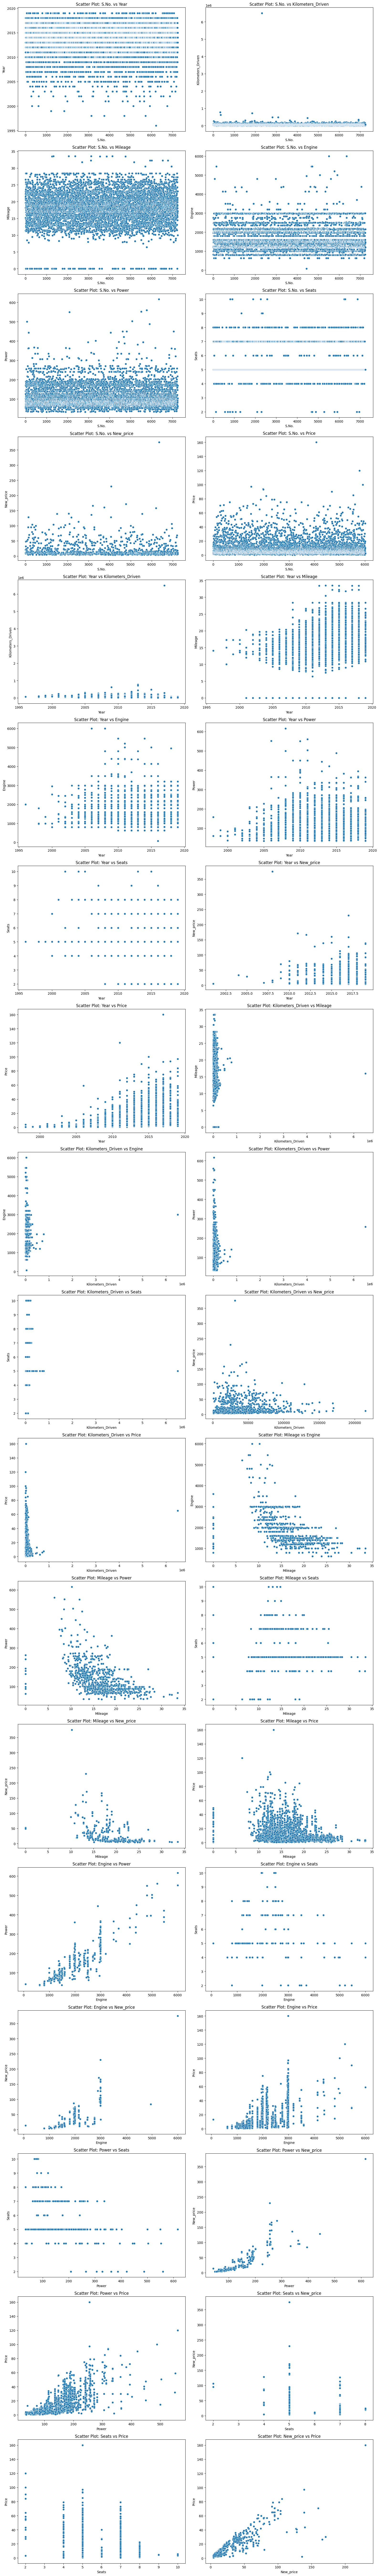

In [ ]:
# 'df' is the DataFrame
# Get a list of numerical column names
numerical_cols = df.select_dtypes(include='number').columns

# Calculate the total number of plots needed
n_plots = len(numerical_cols) * (len(numerical_cols) - 1) // 2

# Setting the layout for 2 plots per row
n_cols = 2
n_rows = (n_plots + n_cols - 1) // n_cols

# Creating the subplot structure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 6 * n_rows))
axes = axes.flatten()  # Flatten the axes array for easy iteration

plot_count = 0
for i in range(len(numerical_cols)):
    for j in range(i + 1, len(numerical_cols)):
        sns.scatterplot(data=df, x=numerical_cols[i], y=numerical_cols[j], ax=axes[plot_count])
        axes[plot_count].set_title(f'Scatter Plot: {numerical_cols[i]} vs {numerical_cols[j]}')
        axes[plot_count].set_xlabel(numerical_cols[i])
        axes[plot_count].set_ylabel(numerical_cols[j])
        plot_count += 1

# Hide any unused axes
for i in range(plot_count, n_rows * n_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [ ]:
# Calculating the correlation matrix for the numerical variables in the DataFrame 'df'
correlation_matrix = df.corr()

# Displaying the correlation matrix
correlation_matrix

S.No.      Year  Kilometers_Driven   Mileage    Engine  \
S.No.              1.000000  0.005573          -0.007697  0.019104 -0.014607   
Year               0.005573  1.000000          -0.187859  0.322463 -0.054693   
Kilometers_Driven -0.007697 -0.187859           1.000000 -0.069122  0.094818   
Mileage            0.019104  0.322463          -0.069122  1.000000 -0.593569   
Engine            -0.014607 -0.054693           0.094818 -0.593569  1.000000   
Power             -0.021667  0.013432           0.030164 -0.531771  0.859771   
Seats             -0.006587  0.007871           0.091159 -0.313011  0.402715   
New_price         -0.065104 -0.058798          -0.008221 -0.378327  0.735981   
Price             -0.020275  0.305327          -0.011493 -0.306593  0.658354   

                      Power     Seats  New_price     Price  
S.No.             -0.021667 -0.006587  -0.065104 -0.020275  
Year               0.013432  0.007871  -0.058798  0.305327  
Kilometers_Driven  0.030164  0.091159  -0.008221 -0.011493  
Mileage           -0.531771 -0.313011  -0.378327 -0.306593  
Engine             0.859771  0.402715   0.735981  0.658354  
Power              1.000000  0.095905   0.877708  0.772566  
Seats              0.095905  1.000000  -0.019459  0.053199  
New_price          0.877708 -0.019459   1.000000  0.871847  
Price              0.772566  0.053199   0.871847  1.000000

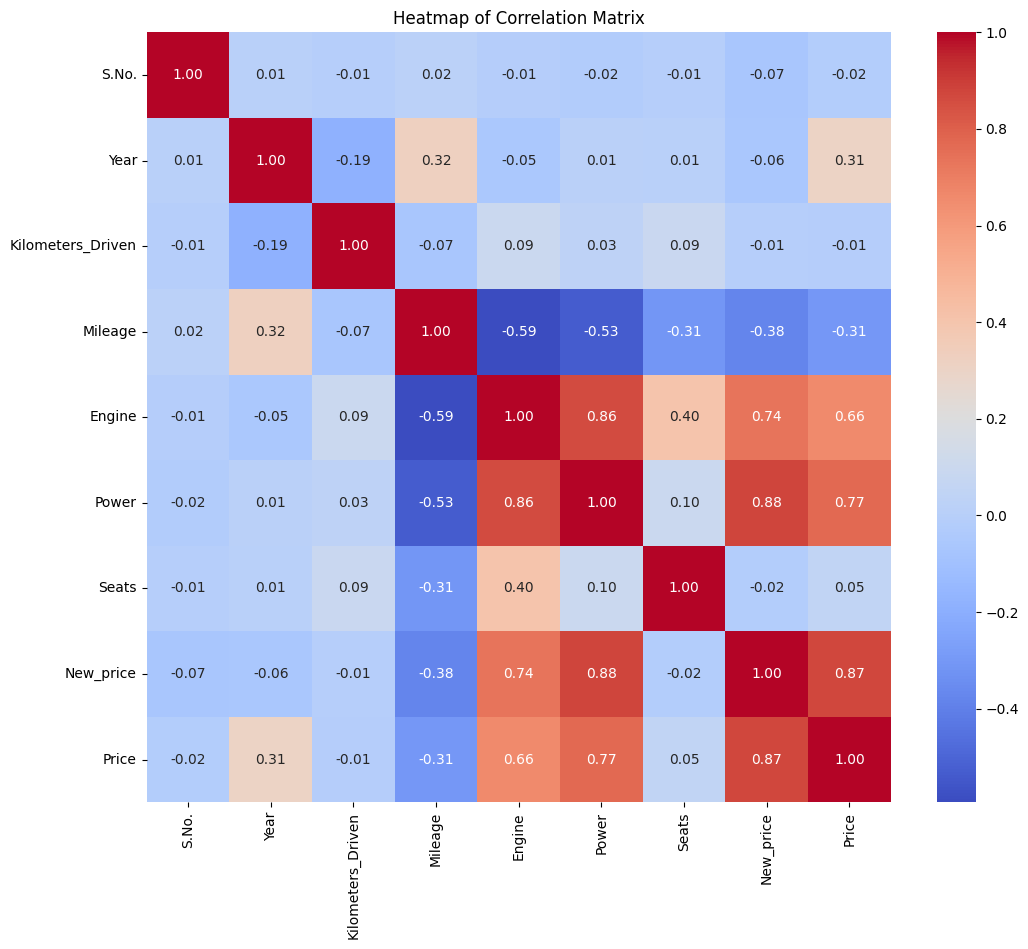

In [ ]:
# Generating a heatmap for the correlation matrix to visualize the relationships more clearly

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()

# **Further Clean the Data based on EDA**.

In [ ]:
# 1. Handling missing values
# MOVED TO SECTION Entitled "MISSING VALUE TREATMENT"
# For numerical columns like 'Mileage', 'Engine', 'Power', 'Seats', and 'Price', we can replace missing values with the median
'''numerical_cols = ['Mileage', 'Engine', 'Power', 'Seats', 'Price']
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)'''

In [ ]:
# For 'New_price', given the high number of missing values, dropping this variable for now. Will determine later if it is crucial for this analysis
df.drop(columns=['New_price'], inplace=True)

In [ ]:
# 2. Correcting data types
# Ensure categorical columns like 'Fuel_Type', 'Transmission', 'Owner_Type', and 'Location' are of type 'category'
categorical_cols = ['Fuel_Type', 'Transmission', 'Owner_Type', 'Location']
for col in categorical_cols:
    df[col] = df[col].astype('category')

In [ ]:
# 3. Removing duplicates
df.drop_duplicates(inplace=True)

# Dropping the 'S.No.' column. It appears to be just a redundant index
df.drop(columns=['S.No.'], inplace=True)

# Verify changes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7253 non-null   object  
 1   Location           7253 non-null   category
 2   Year               7253 non-null   int64   
 3   Kilometers_Driven  7253 non-null   int64   
 4   Fuel_Type          7253 non-null   category
 5   Transmission       7253 non-null   category
 6   Owner_Type         7253 non-null   category
 7   Mileage            7253 non-null   float64 
 8   Engine             7253 non-null   float64 
 9   Power              7253 non-null   float64 
 10  Seats              7253 non-null   float64 
 11  Price              7253 non-null   float64 
dtypes: category(4), float64(5), int64(2), object(1)
memory usage: 539.2+ KB
None


In [ ]:
# Re-Calculating the correlation matrix for the numerical variables in the DataFrame 'df' after further data cleaning
correlation_matrix = df.corr()

# Displaying the correlation matrix
correlation_matrix

Year  Kilometers_Driven   Mileage    Engine     Power  \
Year               1.000000          -0.187859  0.322437 -0.052736  0.025080   
Kilometers_Driven -0.187859           1.000000 -0.069122  0.094591  0.028203   
Mileage            0.322437          -0.069122  1.000000 -0.583279 -0.491079   
Engine            -0.052736           0.094591 -0.583279  1.000000  0.854561   
Power              0.025080           0.028203 -0.491079  0.854561  1.000000   
Seats              0.010522           0.090772 -0.304522  0.402790  0.097618   
Price              0.276009          -0.011062 -0.278190  0.601519  0.702492   

                      Seats     Price  
Year               0.010522  0.276009  
Kilometers_Driven  0.090772 -0.011062  
Mileage           -0.304522 -0.278190  
Engine             0.402790  0.601519  
Power              0.097618  0.702492  
Seats              1.000000  0.048036  
Price              0.048036  1.000000

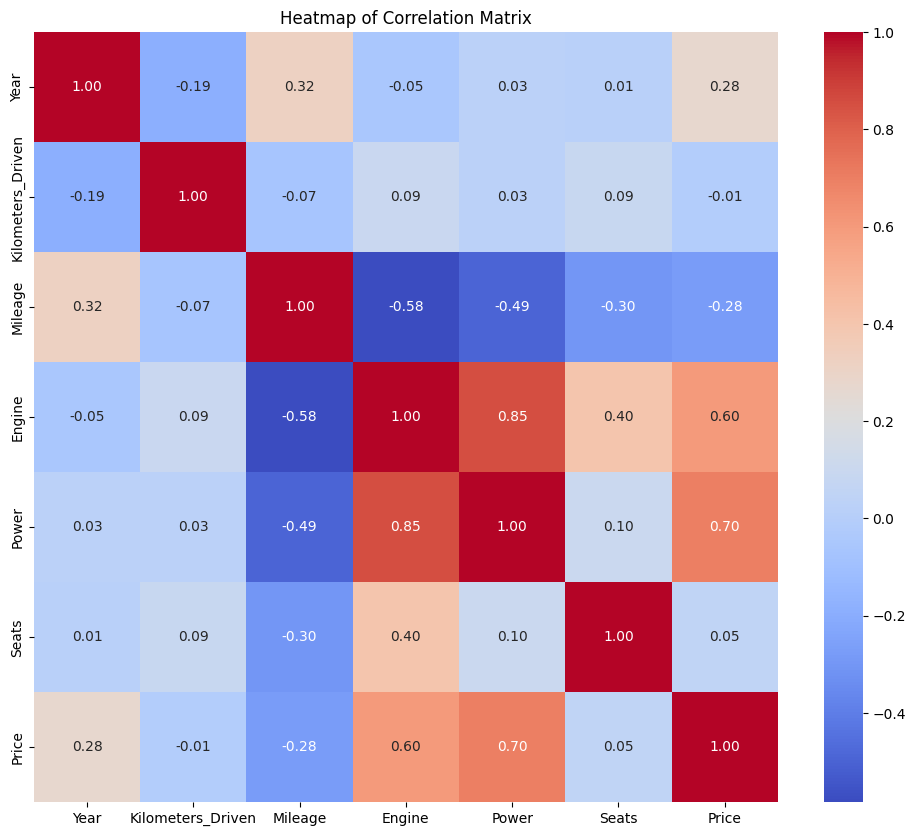

In [ ]:
# Re-Generating a heatmap for the correlation matrix to visualize the relationships more clearly after further data cleaning

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()

### **Feature Engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column?

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

In [ ]:
# Extracting the brand name from the 'Name' column in the dataset
# The assumption is that the brand name is the first word in the 'Name' column
# Assuming the first word is the brand and the rest of the string constitutes the model name
df['Brand'] = df['Name'].apply(lambda x: x.split(' ', 1)[0])
df['Model'] = df['Name'].apply(lambda x: ' '.join(x.split(' ')[1:]))

# Checking the transformation by displaying the first few rows of the updated DataFrame to verify the 'Brand' and 'Model' columns
df[['Name', 'Brand', 'Model']].head()

Name    Brand                       Model
0            Maruti Wagon R LXI CNG   Maruti             Wagon R LXI CNG
1  Hyundai Creta 1.6 CRDi SX Option  Hyundai    Creta 1.6 CRDi SX Option
2                      Honda Jazz V    Honda                      Jazz V
3                 Maruti Ertiga VDI   Maruti                  Ertiga VDI
4   Audi A4 New 2.0 TDI Multitronic     Audi  A4 New 2.0 TDI Multitronic

### **Missing value treatment**

In [ ]:
# 1. Handling missing values
# For numerical columns like 'Mileage', 'Engine', 'Power', 'Seats', and 'Price', we can replace missing values with the median
numerical_cols = ['Mileage', 'Engine', 'Power', 'Seats', 'Price']
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?

After cleaning the data by handling missing values, adjusting data types, removing duplicates, and dropping unnecessary columns, the correlation matrix for the numerical variables in the dataset now reflects the relationships between variables without the influence of missing or improperly formatted data. Here's what the cleaned correlation matrix reveals:

**Year vs. Price:** There is a positive correlation (0.276), suggesting that newer cars tend to be priced higher than older ones.
**Kilometers_Driven vs. Price:** There's a very weak negative correlation (-0.011), indicating that the number of kilometers driven has a negligible impact on price.
**Mileage vs. Price:** The correlation is moderately negative (-0.278), which could mean that cars with higher fuel efficiency tend to be cheaper, although this might also reflect other factors like car size or type.
Engine vs. Price: A moderate positive correlation (0.602) exists here, indicating that cars with larger engines tend to have higher prices.
**Power vs. Price:** This shows a strong positive correlation (0.702), suggesting that more powerful cars are generally more expensive.
**Seats vs. Price**: The correlation is very weak (0.048), implying that the number of seats in a car has a minimal direct impact on its price.
These correlations suggest that while some attributes like the power of the car and the engine size significantly influence the price, other factors like the number of kilometers driven or the number of seats have less impact on a car's market value. This cleaned correlation matrix provides a more accurate representation of relationships between variables, aiding in more reliable bivariate analyses. ​​








## **Building Various Models**


1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name.
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y).
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

**Question:**

1. Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?

For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

### **Hyperparameter Tuning: Decision Tree**

**Feature Importance**

### **Hyperparameter Tuning: Random Forest**

**Feature Importance**

## **Conclusions and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):**
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

**2. Refined insights:**
- What are the most meaningful insights relevant to the problem?

**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?